In [9]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from joblib import dump, load
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, accuracy_score

In [10]:
class_names = [
    "Khmer OS",  
    "Khmer OS Battambong",  
    "Khmer OS Siemreap",  
]
class_labels = {name: index for index, name in enumerate(class_names)}

def load_data():
    DIRECTORY = "data"  # Root directory containing class folders
    IMAGE_SIZE = (64, 64)  # Resize images to this size

    images = []
    labels = []
    print("Loading data...")

    for folder in os.listdir(DIRECTORY):
        folder_path = os.path.join(DIRECTORY, folder)
        if not os.path.isdir(folder_path):  # Skip non-folder files
            continue
        
        # Map folder name to class label
        label = class_labels.get(folder, -1)
        if label == -1:
            print(f"Warning: Folder {folder} does not match any class name.")
            continue

        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            try:
                # Read and preprocess the image
                image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale
                if image is None:  # Skip invalid image files
                    print(f"Skipping invalid image: {file_path}")
                    continue

                image = cv2.resize(image, IMAGE_SIZE)  # Resize to target size
                image = image / 255.0  # Normalize to [0, 1]

                # Append image and label
                images.append(image)
                labels.append(label)
            except Exception as e:
                print(f"Error processing {file_path}: {e}")

    # Convert to numpy arrays
    images = np.array(images, dtype='float32')
    labels = np.array(labels, dtype='int32')

    # Add channel dimension to grayscale images to match input shape for CNNs
    # Shape will become (height, width, 1) for each image
    images = images[..., np.newaxis]

    print("Data loading complete.")
    return images, labels

# Load the dataset
images, labels = load_data()

Loading data...
Data loading complete.


In [11]:
train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.2, random_state=42
)
num_train_samples = train_images.shape[0]
num_test_samples = test_images.shape[0]
train_images = train_images.reshape(num_train_samples, -1)
test_images = test_images.reshape(num_test_samples, -1)

In [12]:
model = SVC(kernel='linear',gamma='auto')
model.fit(train_images, train_labels)
dump(model, 'svm_model.joblib')

['svm_model.joblib']

In [13]:
predictions = model.predict(test_images)

# Step 3: Calculate metrics
accuracy = accuracy_score(test_labels, predictions)
precision = precision_score(test_labels, predictions, average='weighted')  # Use 'macro' or 'micro' if appropriate
recall = recall_score(test_labels, predictions, average='weighted')

# Display the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# Optional: Get a detailed classification report
print("\nClassification Report:\n", classification_report(test_labels, predictions))

Accuracy: 0.78125
Precision: 0.7853565705128205
Recall: 0.78125

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.86      0.83        22
           1       0.92      0.86      0.89        28
           2       0.50      0.50      0.50        14

    accuracy                           0.78        64
   macro avg       0.74      0.74      0.74        64
weighted avg       0.79      0.78      0.78        64




Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.86      0.83        22
           1       0.92      0.86      0.89        28
           2       0.50      0.50      0.50        14

    accuracy                           0.78        64
   macro avg       0.74      0.74      0.74        64
weighted avg       0.79      0.78      0.78        64



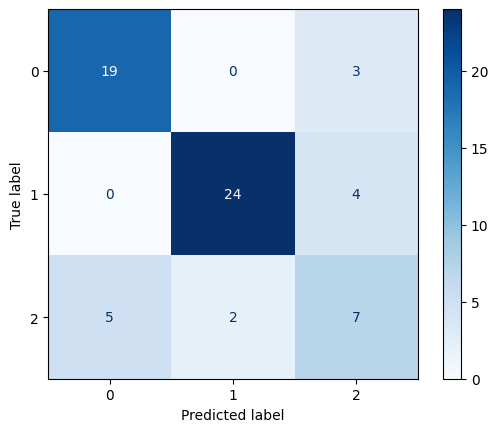

In [14]:
cm = confusion_matrix(test_labels, predictions)

# Step 4: Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')  # You can change the color map if desired

# Optional: Print classification report for additional insights
print("\nClassification Report:\n", classification_report(test_labels, predictions))